<a href="https://colab.research.google.com/github/machiobrian/Energy/blob/master/monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%%capture
! pip install kaggle

In [8]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! kaggle datasets download -d uciml/electric-power-consumption-data-set

 88% 17.0M/19.4M [00:01<00:00, 15.1MB/s]
100% 19.4M/19.4M [00:01<00:00, 10.4MB/s]


In [11]:
! unzip electric-power-consumption-data-set.zip

Archive:  electric-power-consumption-data-set.zip
  inflating: household_power_consumption.txt  


In [ ]:
# look at the data at hand
! pip install pandas
import pandas as pd

df = pd.read_csv("/content/household_power_consumption.txt",delimiter=';')

In [16]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [14]:
# convert features for better analysis
df['date_time'] = pd.to_datetime(df['Date']+' '+df['Time'])

In [15]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [17]:
df['Global_active_power']=pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna(subset=['Global_active_power'])

In [18]:
df['date_time'] = pd.to_datetime(df['date_time'])
df=df.loc[:, ['date_time', 'Global_active_power']]
df.sort_values('date_time', inplace=True, ascending=True)
df=df.reset_index(drop=True)

In [19]:
df['year']=df['date_time'].apply(lambda x:x.year)
df['quarter']=df['date_time'].apply(lambda x:x.quarter)
df['month']=df['date_time'].apply(lambda x:x.month)
df['day']=df['date_time'].apply(lambda x:x.day)

df=df.loc[:, ['date_time', 'Global_active_power','year', 'quarter','month','day']]
df.sort_values('date_time', inplace=True, ascending=True)
df.reset_index(drop=True)
df['weekday']=df.apply(lambda row : row['date_time'].weekday(), axis=1)
df["weekday"]=(df['weekday']<5).astype(int)

In [20]:
print('Rows & Colums: ',df.shape )
print('Start of Time Series: ',df['date_time'].min())
print('Start of Time Series: ',df['date_time'].max())

Rows & Colums:  (2049280, 7)
Start of Time Series:  2006-12-16 17:24:00
Start of Time Series:  2010-12-11 23:59:00


In [21]:
# perfom a check for normal distribution

from scipy import stats
stat, p = stats.normaltest(df.Global_active_power)
print('Statistics=%.3f, p=%.6f' %(stat,p))
alpha = 0.05

if p>alpha :
    print('Data Gaussian')
else:
    print('Data does not look Gaussian')

Statistics=724881.795, p=0.000000
Data does not look Gaussian


In [ ]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2049279
Data columns (total 7 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date_time            datetime64[ns]
 1   Global_active_power  float64       
 2   year                 int64         
 3   quarter              int64         
 4   month                int64         
 5   day                  int64         
 6   weekday              int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 125.1 MB


,date_time,Global_active_power,year,quarter,month,day,weekday
2049275,2010-12-11 23:55:00,0.690,2010,4,12,11,0
2049276,2010-12-11 23:56:00,0.688,2010,4,12,11,0
2049277,2010-12-11 23:57:00,0.688,2010,4,12,11,0
2049278,2010-12-11 23:58:00,0.688,2010,4,12,11,0
2049279,2010-12-11 23:59:00,0.688,2010,4,12,11,0


Exploratory Data Analysis : EDA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


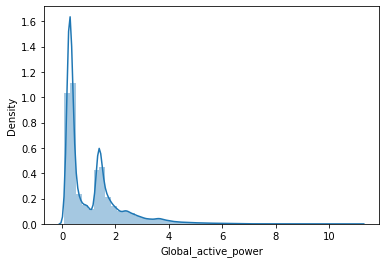

In [22]:
# check for kurtosis and skewness
!pip install seaborn
import seaborn as sns 

sns.distplot(df.Global_active_power)

In [ ]:
# draw a time-series plot

# df1=df.loc[:,["date_time", "Global_active_power"]]
# df1.set_index('date_time', inplace=True)
# df.plot(figsize=(12,5))

# import matplotlib.pyplot as plt
# %matplotlib inline 

# plt.ylabel('Global_active_power')
# plt.legend().set_visible(False)
# plt.tight_layout()

# plt.title('Global Active Power Time Series')
# sns.despine(top=True)
# plt.show()

Procedure for model preparation

* Use LSTM model to predict
* Convert all data to float
* Normalize the feature
* Convert the array into Matrix
* Re-shape into x=t and y=t+1
* reshape input to be 3D (samples, timesteps, feature)

In [23]:
! pip install numpy
import numpy as np


dataset = df.Global_active_power.values
dataset = dataset.astype('float32')
dataset = np.reshape(dataset,(-1,1))

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler(feature_range=(0,1))

dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset)*0.8)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

def create_dataset(dataset, look_back=1):
    x,y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        x.append(a)
        y.append(dataset[i+look_back,0])
    return np.array(x), np.array(y)

look_back = 30

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# Reshape inputs
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x_test.shape[1]))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
#train the model
! pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from keras.utils import Sequence
from keras.layers import *
from keras.callbacks import EarlyStopping
from datetime import timedelta
import math

model = keras.Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history=model.fit(x_train,y_train, epochs=20, batch_size=70,validation_data=(x_test,y_test),
                  callbacks=[EarlyStopping(monitor='val_loss',patience=10)],verbose=1,shuffle=False)

model.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/20
23420/23420 [==============================] - 120s 5ms/step - loss: 7.9907e-04 - val_loss: 4.1186e-04
Epoch 2/20
23420/23420 [==============================] - 113s 5ms/step - loss: 6.7741e-04 - val_loss: 4.4831e-04
Epoch 3/20
23420/23420 [==============================] - 110s 5ms/step - loss: 6.4974e-04 - val_loss: 4.5336e-04
Epoch 4/20
23420/23420 [==============================] - 105s 4ms/step - loss: 6.4282e-04 - val_loss: 4.4748e-04
Epoch 5/20
23420/23420 [==============================] - 115s 5ms/step - loss: 6.4076e-04 - val_loss: 4.2905e-04
Epoch 6/20
23420/23420 [==============================] - 106s 5ms/step - loss: 6.3682e-04 - val_loss: 4.3851e-04
Epoch 7/20
23420/23420 [==============================] - 111s 5ms/step - loss: 6.3426e-04 - val_loss: 4.3092e-04
Epoch 8/20
23420/23420 [==============================] - 112s 5ms/step - loss: 6.3385e-04 - val_loss: 

In [1]:
# Make predictions

train_predict = model.predict(x_train)

NameError: ignored

In [26]:
# invert predictions

y_train = scaler.inverse_transform(train_predict)

In [29]:
# mean_absolute_error,

from sklearn.metrics import mean_absolute_error
print('Train Mean Absolute Error: ', mean_absolute_error(y_train[0], train_predict[:, 0]))

ValueError: ignored